# Imports

In [59]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd


# Importação dos dados

In [60]:
data = pd.read_csv('b2w.csv')

# Análise exploratória

In [61]:
data.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [62]:
print(data.shape)
print(data.columns)

(132373, 8)
Index(['original_index', 'review_text', 'review_text_processed',
       'review_text_tokenized', 'polarity', 'rating', 'kfold_polarity',
       'kfold_rating'],
      dtype='object')


In [65]:
data = data.dropna()
data

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
5,129809,"ótmo produto atendeu as expectativas, a entreg...","otmo produto atendeu as expectativas, a entreg...","['otmo', 'produto', 'atendeu', 'as', 'expectat...",1.0,4,1,1
...,...,...,...,...,...,...,...,...
132367,122579,"Ótimo jogo, um dos melhores que joguei. Entreg...","otimo jogo, um dos melhores que joguei. entreg...","['otimo', 'jogo', 'um', 'dos', 'melhores', 'qu...",1.0,5,10,10
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10


In [67]:
data['polarity'].value_counts() / len(data)

1.0    0.691895
0.0    0.308105
Name: polarity, dtype: float64

# Pré-processamento dos dados

In [68]:
raw_data = data[['review_text_processed', 'polarity']]

In [69]:
temp = []

# Passando de pd.Series para list
data_to_list = data['review_text_processed'].values.tolist()
for i in range(len(data_to_list)):
  temp.append(data_to_list[i])

list(temp[:5])

['bem macio e felpudo...recomendo.  preco imbativel e entrega rapida. compraria outro quando precisar',
 'produto excepcional!  recomendo!!! inovador e gostoso de ler!!',
 'recebi o produto antes do prazo mas veio com defeito na trava ou seja nao da para usar e ate agora a americanas nao resolveu e preciso muito deste produto',
 'bom custo beneficio. adequado para pessoas que fazem um uso casual do aparelho . a maquina fotografica e excelente . a tela fornece imagens otimas . os recursos do aparelho sao faceis de manejar.',
 'otmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom']

In [70]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remove pontuações

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['bem', 'macio', 'felpudo', 'recomendo', 'preco', 'imbativel', 'entrega', 'rapida', 'compraria', 'outro', 'quando', 'precisar'], ['produto', 'excepcional', 'recomendo', 'inovador', 'gostoso', 'de', 'ler'], ['recebi', 'produto', 'antes', 'do', 'prazo', 'mas', 'veio', 'com', 'defeito', 'na', 'trava', 'ou', 'seja', 'nao', 'da', 'para', 'usar', 'ate', 'agora', 'americanas', 'nao', 'resolveu', 'preciso', 'muito', 'deste', 'produto'], ['bom', 'custo', 'beneficio', 'adequado', 'para', 'pessoas', 'que', 'fazem', 'um', 'uso', 'casual', 'do', 'aparelho', 'maquina', 'fotografica', 'excelente', 'tela', 'fornece', 'imagens', 'otimas', 'os', 'recursos', 'do', 'aparelho', 'sao', 'faceis', 'de', 'manejar'], ['otmo', 'produto', 'atendeu', 'as', 'expectativas', 'entrega', 'ocorreu', 'antes', 'do', 'previsto', 'muito', 'bom'], ['gostei', 'muito', 'do', 'produto', 'tem', 'otima', 'qualidade', 'facilita', 'muito', 'aplicacao', 'do', 'gel'], ['adorei', 'entrega', 'no', 'prazo', 'produto', 'conforme', 'eu',

In [71]:
len(data_words)

116058

In [72]:
def detokenize(text):
  return TreebankWordDetokenizer().detokenize(text)

In [73]:
data = []
for i in range(len(data_words)):
  data.append(detokenize(data_words[i]))

print(data[:5])

['bem macio felpudo recomendo preco imbativel entrega rapida compraria outro quando precisar', 'produto excepcional recomendo inovador gostoso de ler', 'recebi produto antes do prazo mas veio com defeito na trava ou seja nao da para usar ate agora americanas nao resolveu preciso muito deste produto', 'bom custo beneficio adequado para pessoas que fazem um uso casual do aparelho maquina fotografica excelente tela fornece imagens otimas os recursos do aparelho sao faceis de manejar', 'otmo produto atendeu as expectativas entrega ocorreu antes do previsto muito bom']


In [74]:
data = np.array(data)

# Label encoding*

In [93]:
labels = np.array(raw_data['polarity'])
print(labels)
print(len(labels))

[1. 1. 0. ... 0. 0. 0.]
116058


# Tokenização e divisão dos dados

In [94]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
reviews = pad_sequences(sequences, maxlen = max_len)
print(reviews)

[[   0    0    0 ...  119   88 1104]
 [   0    0    0 ... 1773    1  858]
 [   0    0    0 ...    5  438    2]
 ...
 [   0    0    0 ...  569   21  307]
 [   0    0    0 ...  145   65 1750]
 [   0    0    0 ...    1    4 2124]]


In [95]:
print(labels)

[1. 1. 0. ... 0. 0. 0.]


In [96]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, random_state=0, stratify = labels)
print (len(X_train),len(X_test),len(y_train),len(y_test))

87043 29015 87043 29015


# Construção do modelo de rede neural

In [101]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=0, baseline = 0.95)

model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15, dropout = 0.5))
model1.add(layers.Dense(1, activation = 'sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1, callback])

Epoch 1/70
2721/2721 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9150
Epoch 1: val_accuracy improved from -inf to 0.93858, saving model to best_model1.hdf5
2721/2721 [==============================] - 163s 59ms/step - loss: 0.2143 - accuracy: 0.9150 - val_loss: 0.1647 - val_accuracy: 0.9386
Epoch 2/70
2720/2721 [============================>.] - ETA: 0s - loss: 0.1591 - accuracy: 0.9405
Epoch 2: val_accuracy improved from 0.93858 to 0.94282, saving model to best_model1.hdf5
2721/2721 [==============================] - 170s 63ms/step - loss: 0.1591 - accuracy: 0.9405 - val_loss: 0.1546 - val_accuracy: 0.9428


In [103]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose = 2)
print('Model accuracy: ', test_acc)

907/907 - 11s - loss: 0.1546 - accuracy: 0.9428 - 11s/epoch - 12ms/step
Model accuracy:  0.9428226947784424


In [104]:
predictions = model1.predict(X_test)

907/907 [==============================] - 12s 13ms/step


In [113]:
predictions

array([[0.9909394 ],
       [0.9973537 ],
       [0.99932796],
       ...,
       [0.01157255],
       [0.98761195],
       [0.23621121]], dtype=float32)

# Matriz de confusão

<AxesSubplot: >

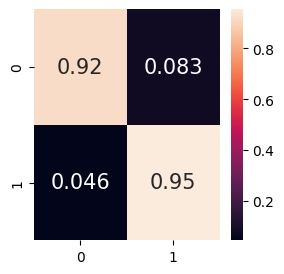

In [119]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, np.around(predictions))

import seaborn as sns

conf_matrix = conf_matrix = pd.DataFrame(matrix)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (3, 3))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})